In [2]:
import zipfile
import os

# Path to your uploaded file
zip_path = "/content/archive (1).zip"
extract_path = "/kaggle/working/fake_news_data"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
print(os.listdir(extract_path))

['News _dataset']


<>:39: SyntaxWarning: invalid escape sequence '\w'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\w'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1008261854.py:39: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
/tmp/ipython-input-1008261854.py:40: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip()


Fake shape: (23481, 4)
True shape: (21417, 4)
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      0  
1       April 5, 2017       1  
2  September 27, 2017       1  
3         May 22, 2017      0  
4       June 24, 2016       1  

Acc

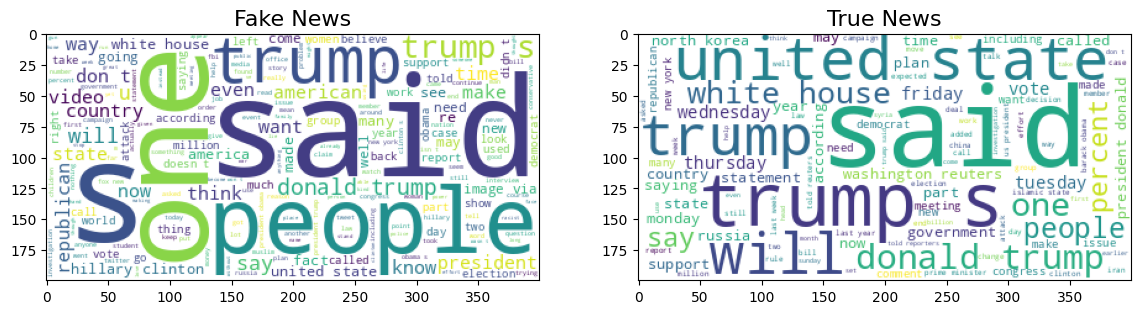


Prediction for sample text: Fake


In [4]:
# ============================
# FAKE NEWS DETECTION PROJECT
# ============================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

# Step 2: Load dataset
fake_df = pd.read_csv("/kaggle/working/fake_news_data/News _dataset/Fake.csv")
true_df = pd.read_csv("/kaggle/working/fake_news_data/News _dataset/True.csv")

print("Fake shape:", fake_df.shape)
print("True shape:", true_df.shape)

# Step 3: Add labels
fake_df["label"] = 0   # 0 = Fake
true_df["label"] = 1   # 1 = True

# Step 4: Combine datasets
df = pd.concat([fake_df, true_df]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df.head())

# Step 5: Data cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove links
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

df['text'] = df['title'] + " " + df['text']   # combine title & text
df['text'] = df['text'].apply(clean_text)

# Step 6: Split data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 7: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 8: Model training (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Step 9: Predictions & Evaluation
y_pred = model.predict(X_test_tfidf)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Visualization — WordClouds
fake_text = ' '.join(df[df['label']==0]['text'])
real_text = ' '.join(df[df['label']==1]['text'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(max_words=1500, background_color='white').generate(fake_text))
plt.title('Fake News', fontsize=16)

plt.subplot(1,2,2)
plt.imshow(WordCloud(max_words=1500, background_color='white').generate(real_text))
plt.title('True News', fontsize=16)
plt.show()

# Step 11: Example prediction
sample = ["Breaking: Scientists found aliens in Mars!"]
sample_tfidf = tfidf.transform(sample)
print("\nPrediction for sample text:", "Fake" if model.predict(sample_tfidf)[0]==0 else "True")